In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\miro\AppData\Local\Temp\ipykernel_1888\1881315645.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_gender_submission = pd.read_csv('gender_submission.csv')
df_gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [4]:
df_test = pd.read_csv('test.csv')
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_train = pd.read_csv('train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df_train2 = df_train.drop('Survived', axis=1)
df_train2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df_concat = pd.concat([df_train2, df_test], ignore_index=True)
df_concat.to_csv('data_concat.csv', index=False)

In [8]:
df_concat['Pclass'].value_counts()

Pclass
3    709
1    323
2    277
Name: count, dtype: int64

C:\Users\miro\AppData\Local\Temp\ipykernel_1888\536221921.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Pclass', data=df_concat, palette='viridis')


Text(0, 0.5, 'Nombre de passager')

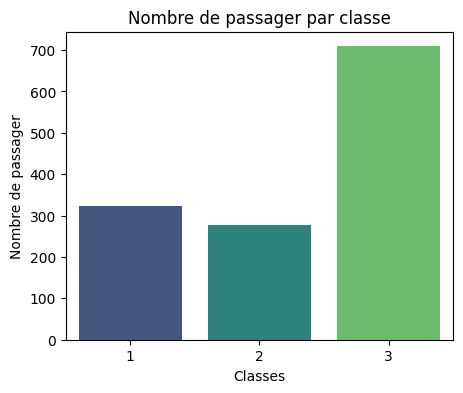

In [9]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Pclass', data=df_concat, palette='viridis')
ax.set_title('Nombre de passager par classe')
ax.set_xlabel('Classes')
ax.set_ylabel('Nombre de passager')

C:\Users\miro\AppData\Local\Temp\ipykernel_1888\955060735.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Sex', data=df_concat, palette='viridis')


Text(0, 0.5, 'Nombre de passager')

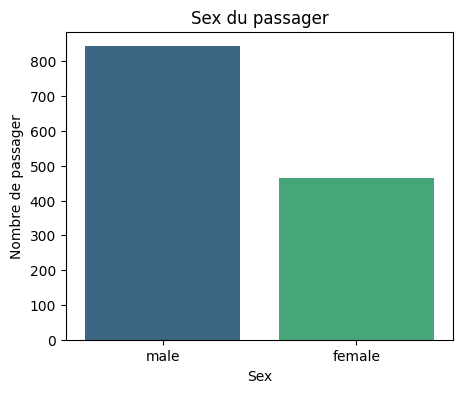

In [10]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Sex', data=df_concat, palette='viridis')
ax.set_title('Sex du passager')
ax.set_xlabel('Sex')
ax.set_ylabel('Nombre de passager')

In [11]:
df_concat['Sex'].value_counts()

Sex
male      843
female    466
Name: count, dtype: int64

C:\Users\miro\AppData\Local\Temp\ipykernel_1888\2209273786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Age', data=df_concat, palette='viridis')


Text(0, 0.5, 'Age')

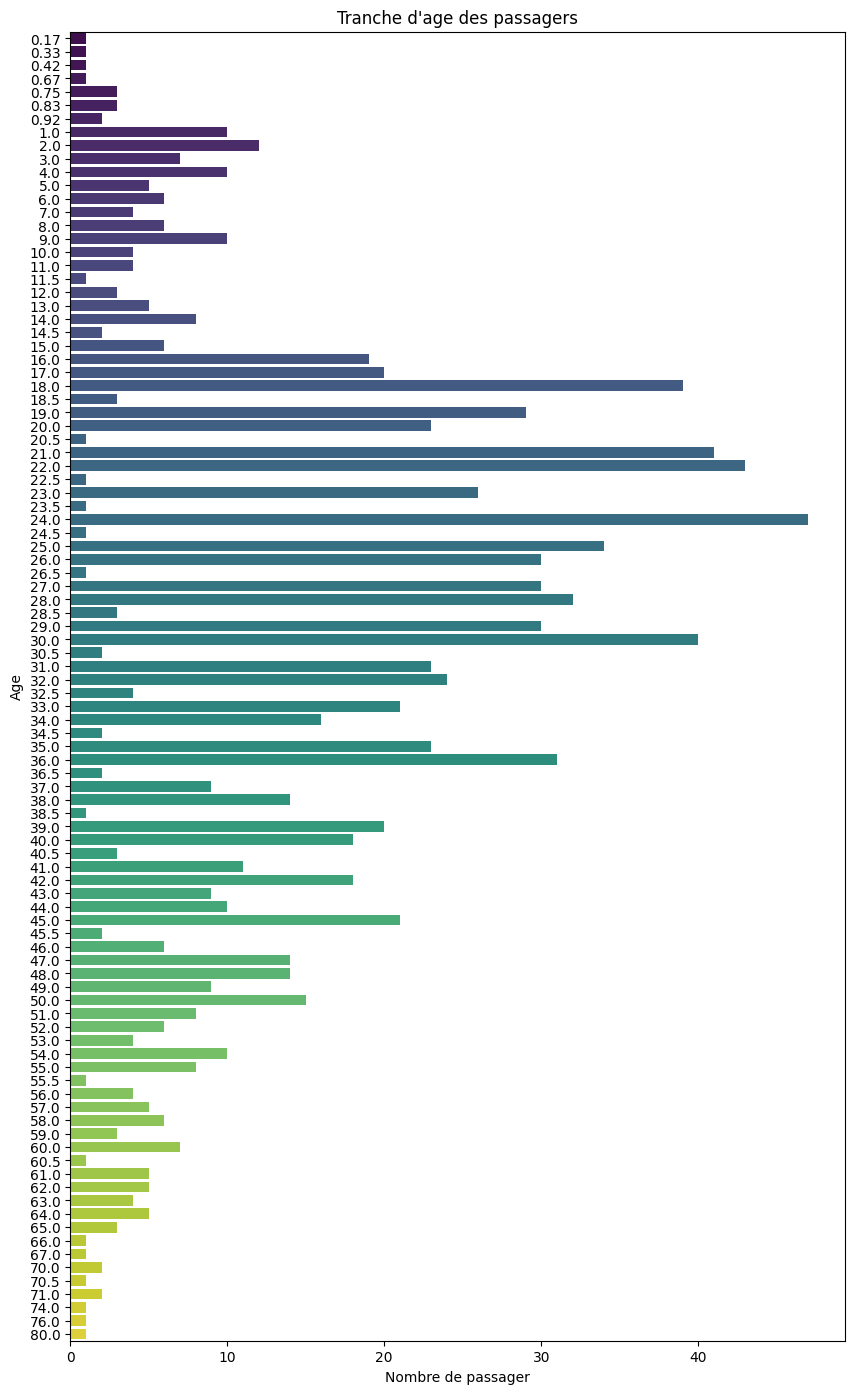

In [12]:
plt.figure(figsize=(10, 17))
ax = sns.countplot(y='Age', data=df_concat, palette='viridis')
ax.set_title('Tranche d\'age des passagers')
ax.set_xlabel('Nombre de passager')
ax.set_ylabel('Age')

In [13]:
df = df_test.merge(df_gender_submission, how='left', on='PassengerId')

In [14]:
df = pd.concat([df_train, df], ignore_index=True)

In [15]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


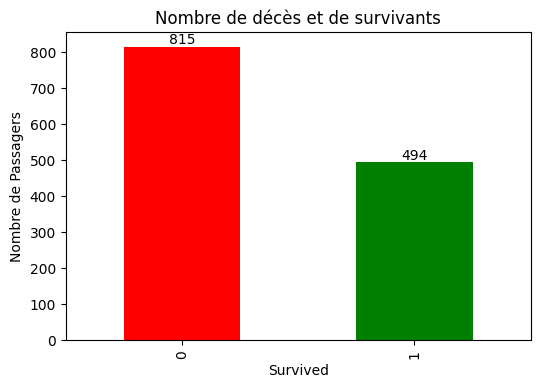

In [16]:
survival_counts = df['Survived'].value_counts()

ax = survival_counts.plot(kind='bar', color=['red', 'green'], figsize=(6, 4))
ax.set_ylabel('Nombre de Passagers')
ax.set_xlabel('Survived')
ax.set_title('Nombre de décès et de survivants')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width / 2, y + height), ha='center', va='bottom')

plt.show()

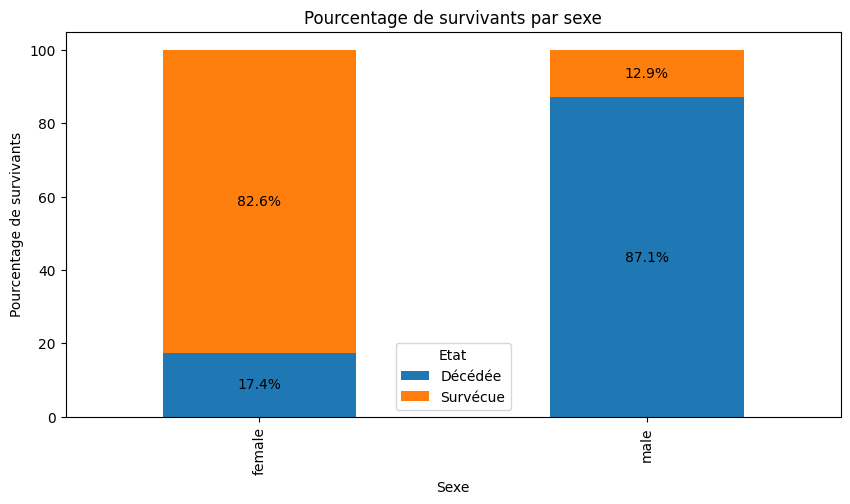

In [34]:
survival_percentage = df.groupby('Sex')['Survived'].value_counts(normalize=True).unstack() * 100

ax = survival_percentage.plot(kind='bar', stacked=True, figsize=(10, 5))
ax.set_ylabel('Pourcentage de survivants')
ax.set_xlabel('Sexe')
ax.set_title('Pourcentage de survivants par sexe')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

legend_labels = {'0': 'Décédée', '1': 'Survécue'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], [legend_labels['0'], legend_labels['1']], title='Etat')

plt.show()

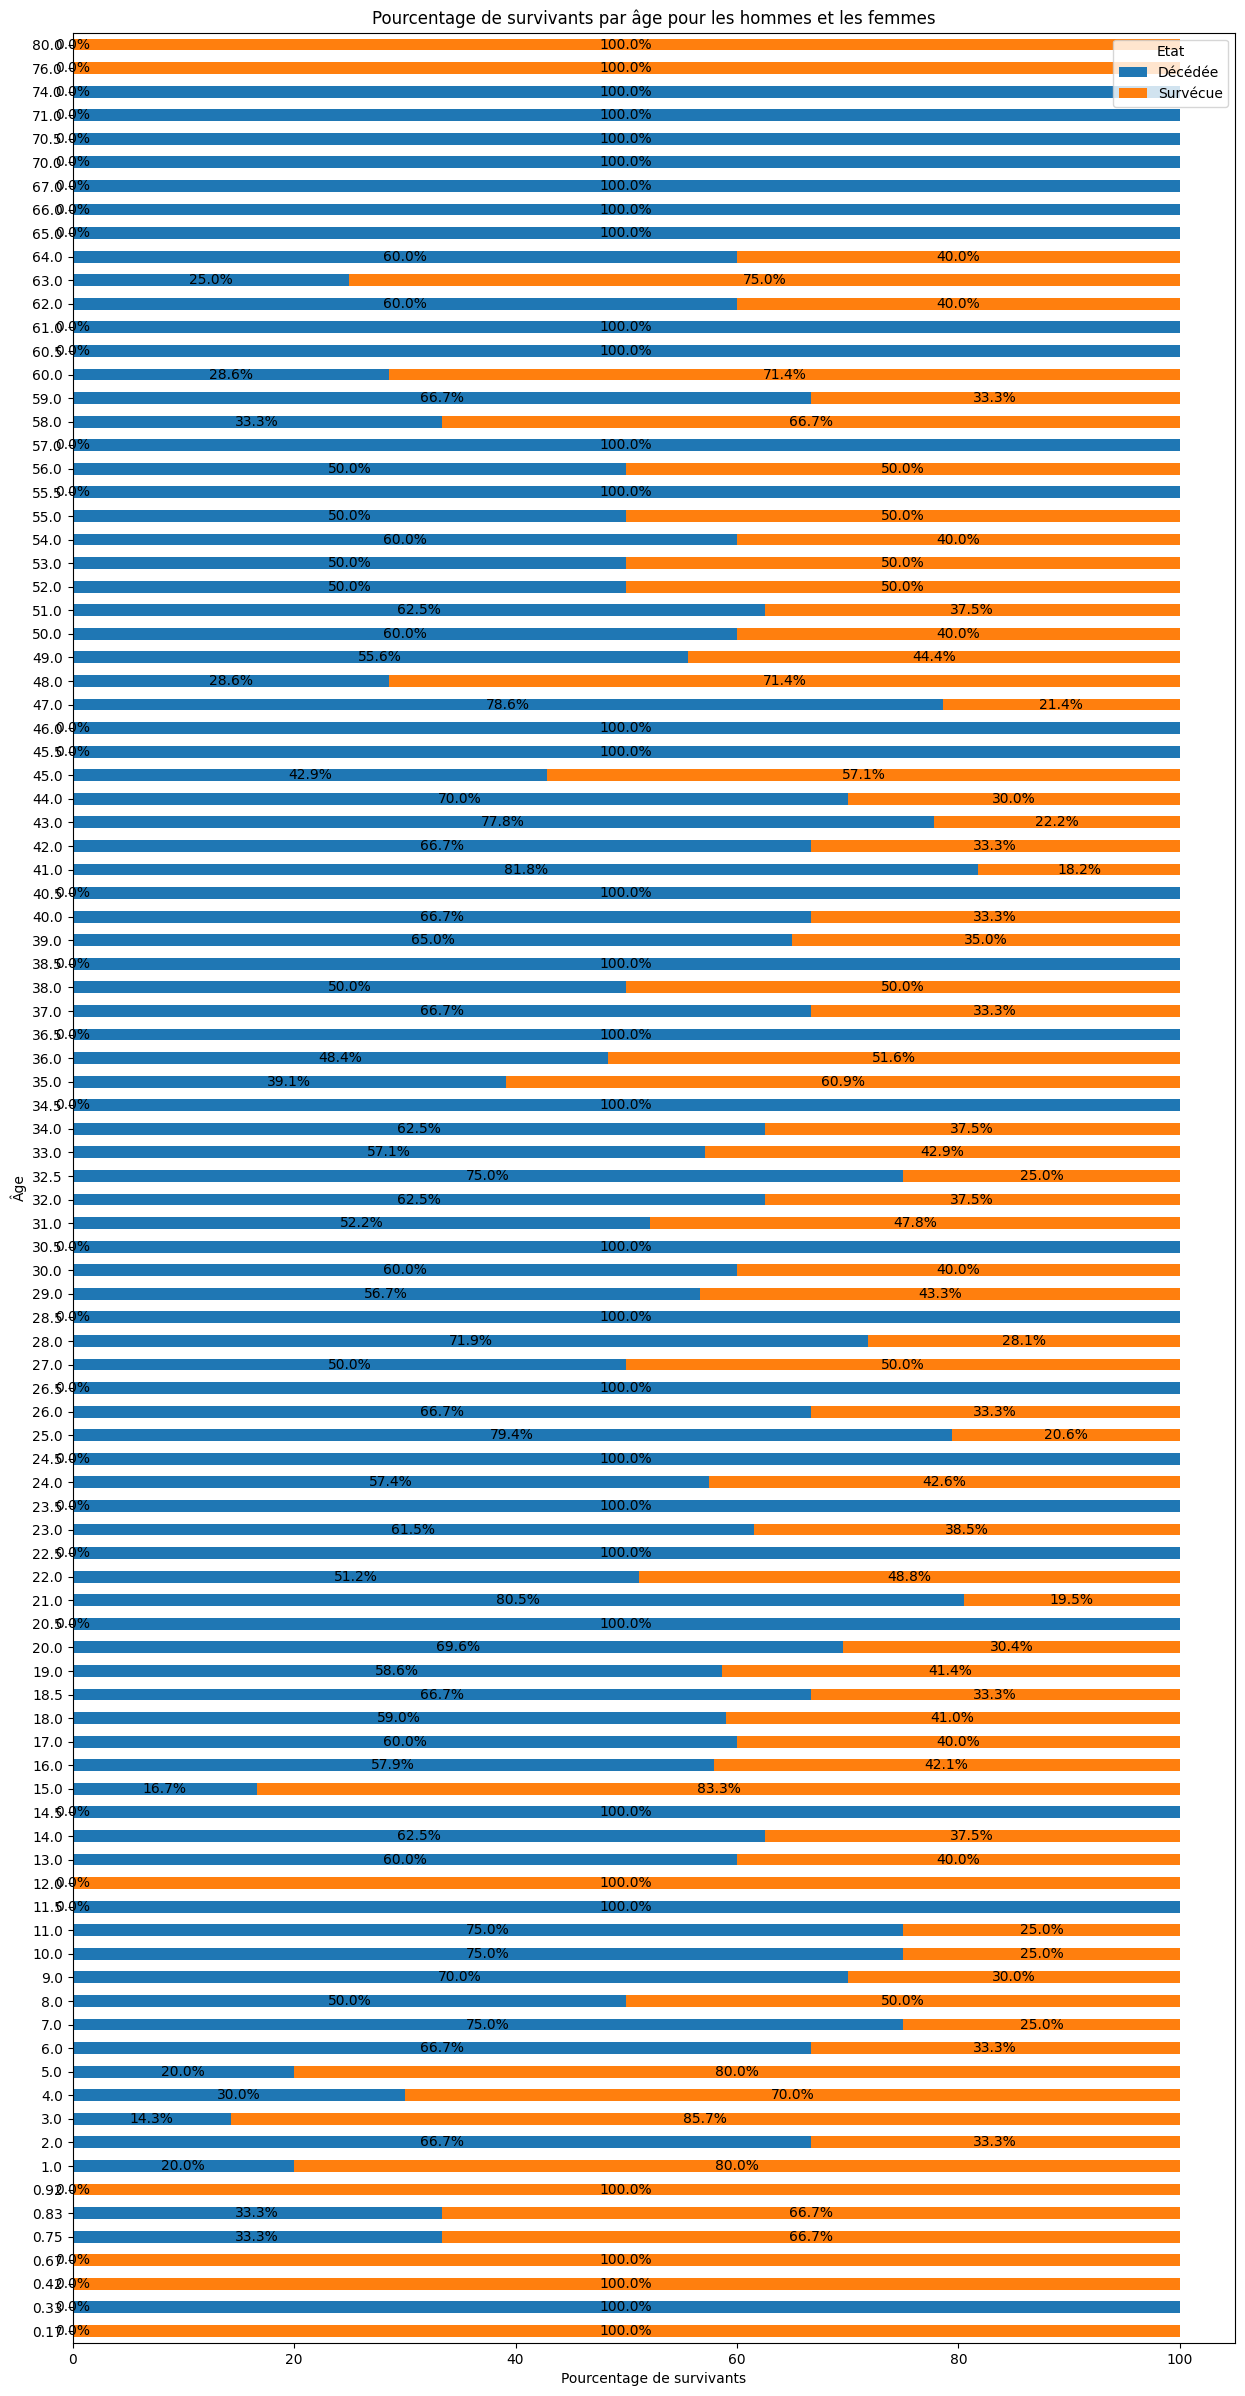

In [33]:
survival_percentage = df.groupby('Age')['Survived'].value_counts(normalize=True).unstack() * 100

ax = survival_percentage.plot(kind='barh', stacked=True, figsize=(15, 30))
ax.set_xlabel('Pourcentage de survivants')
ax.set_ylabel('Âge')
ax.set_title('Pourcentage de survivants par âge pour les hommes et les femmes')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

legend_labels = {'0': 'Décédée', '1': 'Survécue'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], [legend_labels['0'], legend_labels['1']], title='Etat')

plt.show()

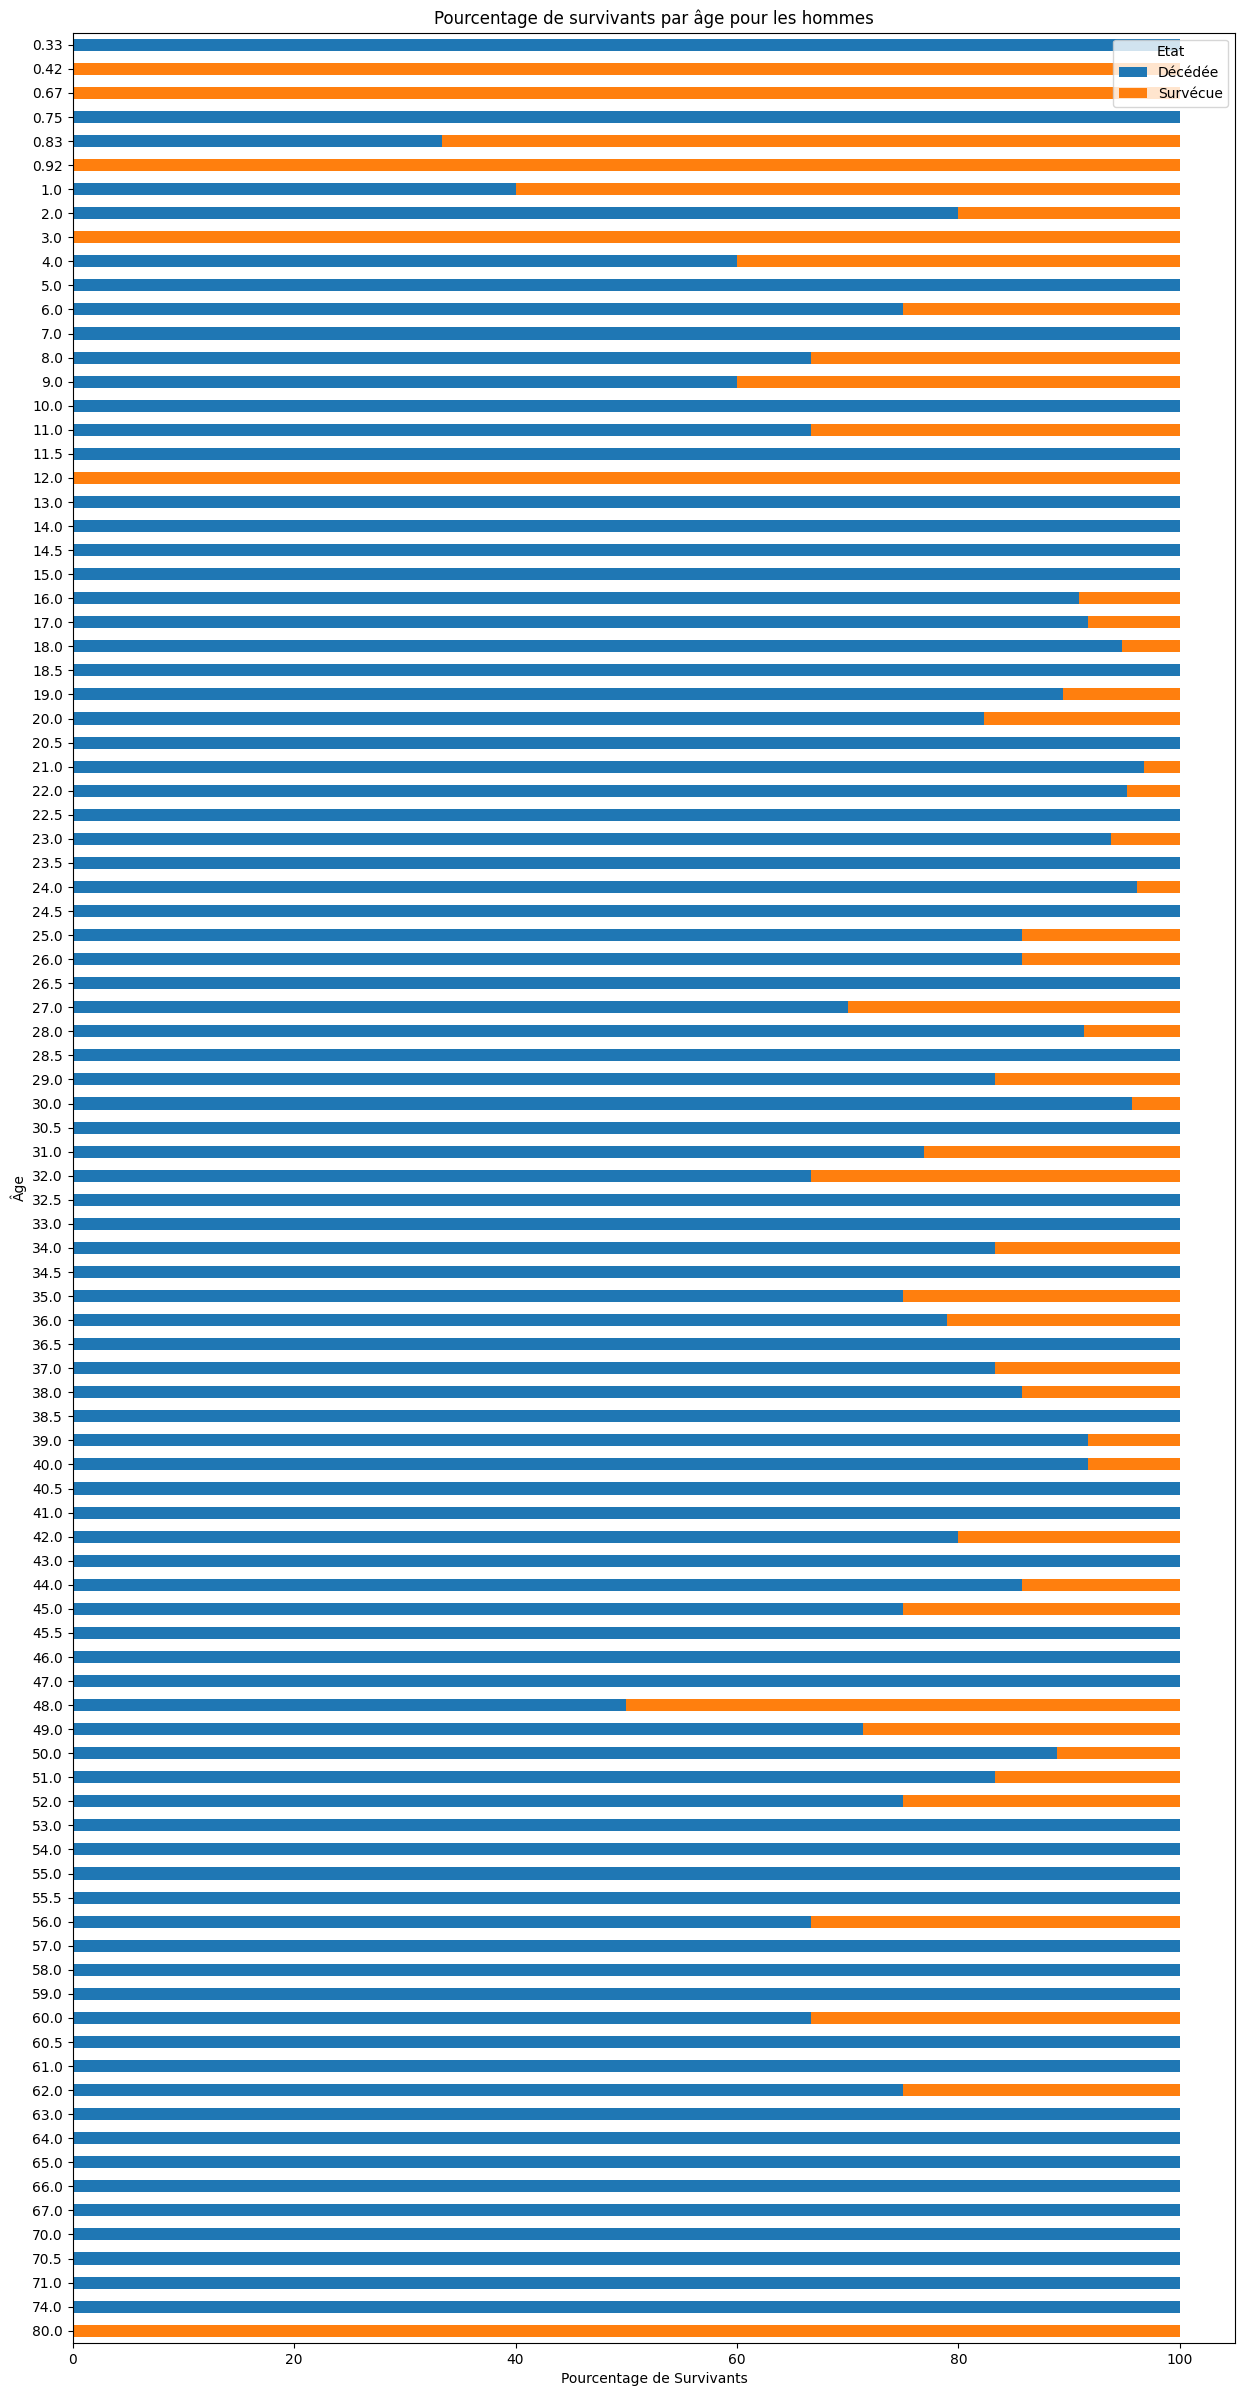

In [32]:
survival_counts = df[df['Sex'] == 'male'].groupby(['Age', 'Survived']).size().unstack()
survival_percentage = (survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100).sort_index(ascending=False)

ax = survival_percentage.plot(kind='barh', stacked=True, figsize=(15, 30))
ax.set_xlabel('Pourcentage de Survivants')
ax.set_ylabel('Âge')
ax.set_title('Pourcentage de survivants par âge pour les hommes')

legend_labels = {'0': 'Décédée', '1': 'Survécue'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], [legend_labels['0'], legend_labels['1']], title='Etat')

plt.show()

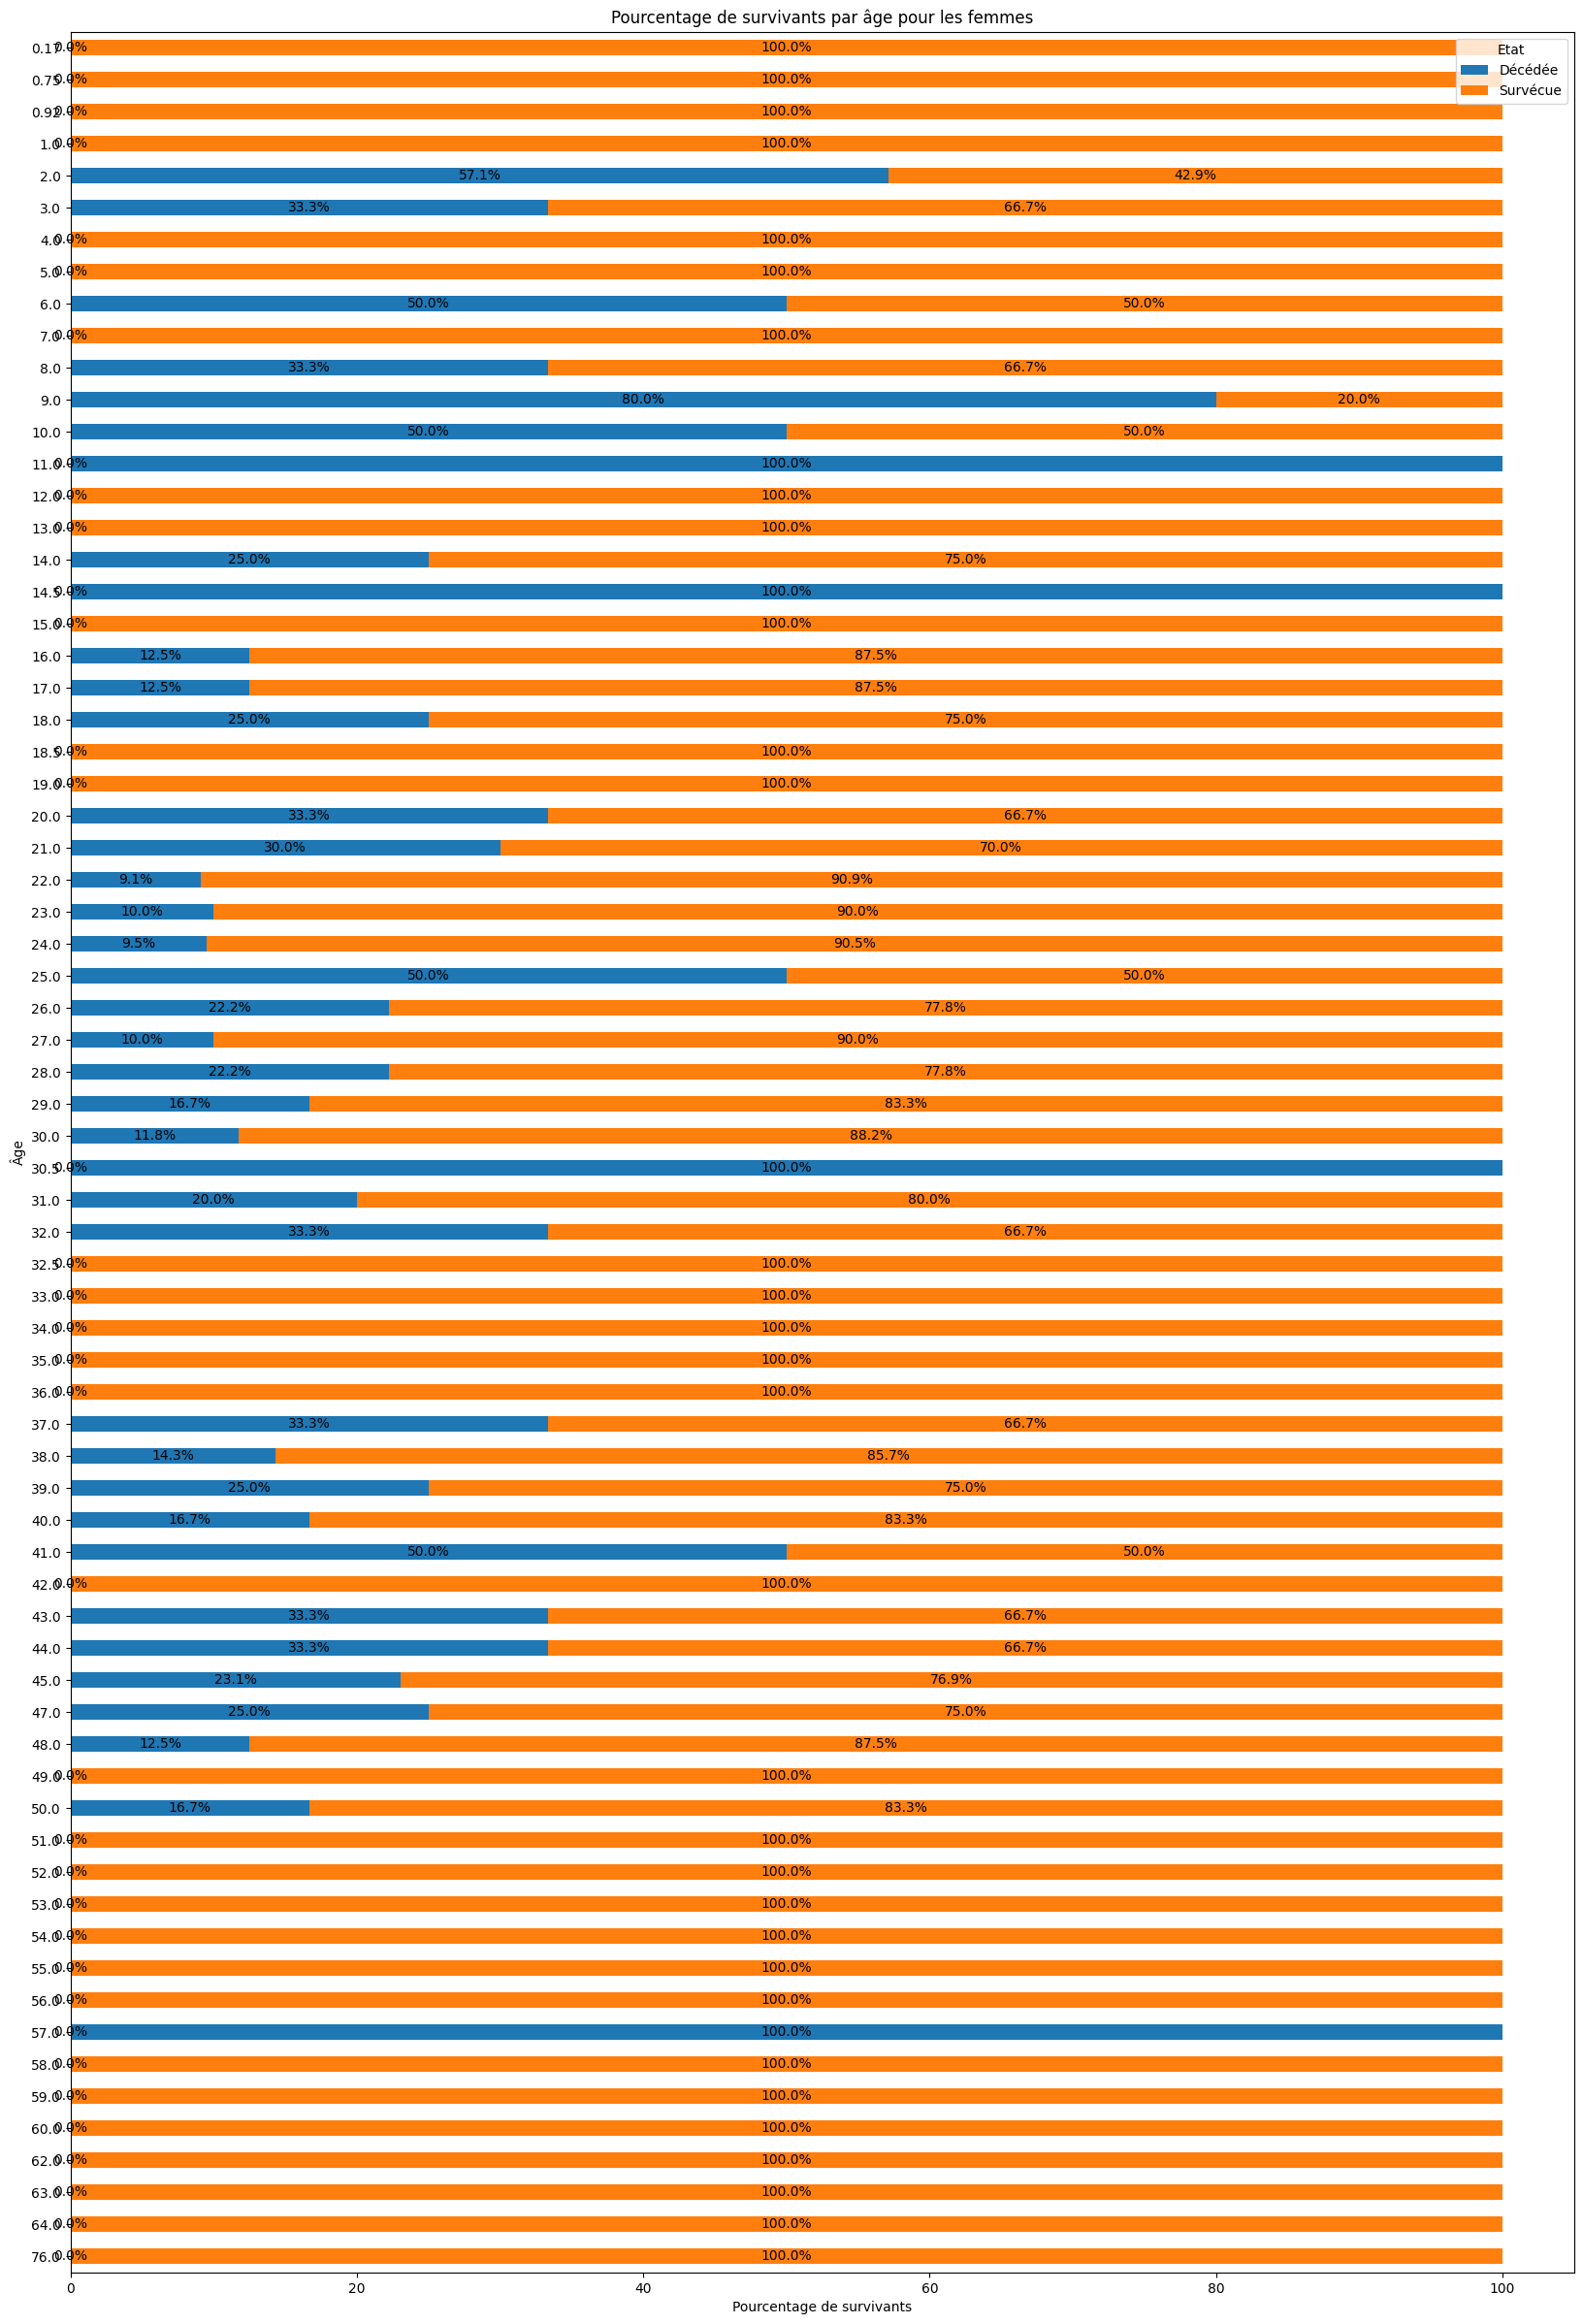

In [31]:
survival_counts = df[df['Sex'] == 'female'].groupby(['Age', 'Survived']).size().unstack()
survival_percentage = (survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100).sort_index(ascending=False)


ax = survival_percentage.plot(kind='barh', stacked=True, figsize=(20, 30))
ax.set_xlabel('Pourcentage de survivants') 
ax.set_ylabel('Âge')
ax.set_title('Pourcentage de survivants par âge pour les femmes')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

legend_labels = {'0': 'Décédée', '1': 'Survécue'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], [legend_labels['0'], legend_labels['1']], title='Etat')

plt.show()

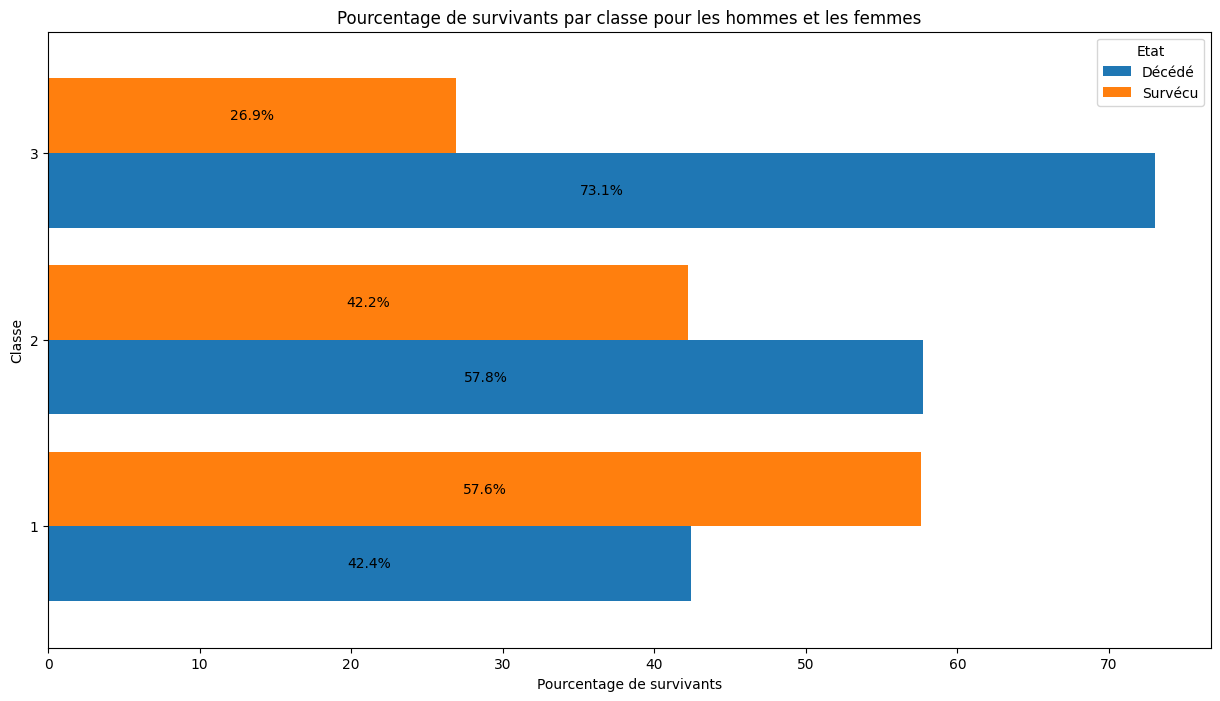

In [28]:
survival_percentage = df.groupby('Pclass')['Survived'].value_counts(normalize=True).unstack() * 100

ax = survival_percentage.plot(kind='barh', figsize=(15, 8), width=0.8)
ax.set_xlabel('Pourcentage de survivants')
ax.set_ylabel('Classe')
ax.set_title('Pourcentage de survivants par classe pour les hommes et les femmes')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

legend_labels = {'0': 'Décédé', '1': 'Survécu'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], [legend_labels['0'], legend_labels['1']], title='Etat')

plt.show()

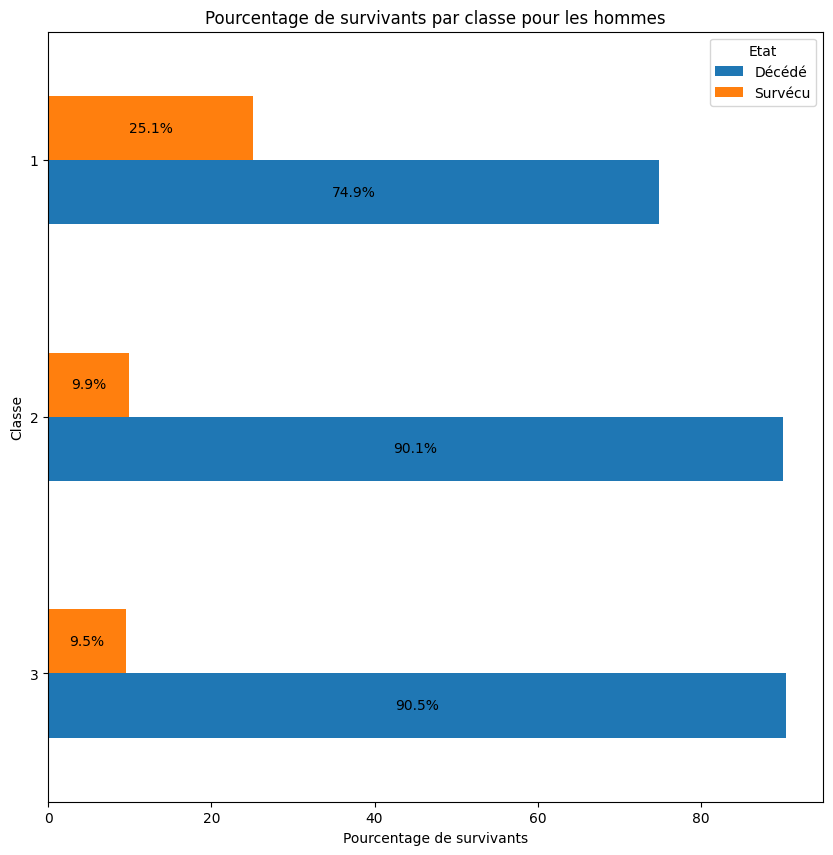

In [26]:
survival_counts = df[df['Sex'] == 'male'].groupby(['Pclass', 'Survived']).size().unstack()
survival_percentage = (survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100).sort_index(ascending=False)


ax = survival_percentage.plot(kind='barh', figsize=(10, 10))
ax.set_xlabel('Pourcentage de survivants') 
ax.set_ylabel('Classe')
ax.set_title('Pourcentage de survivants par classe pour les hommes')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

legend_labels = {'0': 'Décédé', '1': 'Survécu'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], [legend_labels['0'], legend_labels['1']], title='Etat')

plt.show()

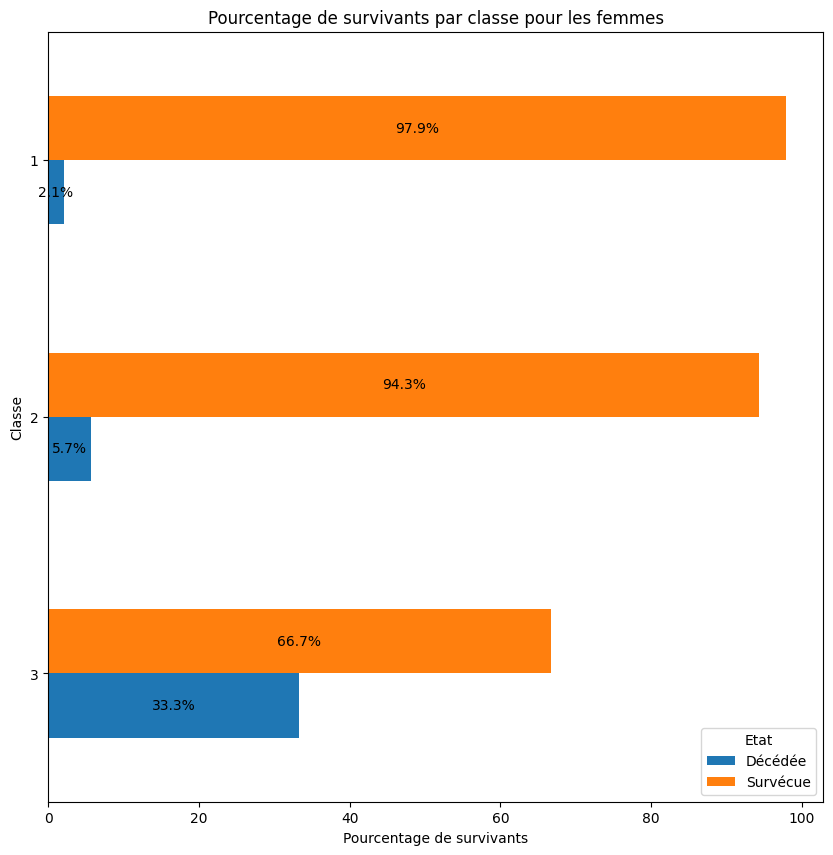

In [27]:
survival_counts = df[df['Sex'] == 'female'].groupby(['Pclass', 'Survived']).size().unstack()
survival_percentage = (survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100).sort_index(ascending=False)


ax = survival_percentage.plot(kind='barh', figsize=(10, 10))
ax.set_xlabel('Pourcentage de survivants') 
ax.set_ylabel('Classe')
ax.set_title('Pourcentage de survivants par classe pour les femmes')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

legend_labels = {'0': 'Décédée', '1': 'Survécue'}
handles, _ = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[1]], [legend_labels['0'], legend_labels['1']], title='Etat')

plt.show()